# Sean Pharris
# March 16, 2022
# PCA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clean-churn-data/churn_clean.csv
/kaggle/input/clean-churn-data/D207 D208 D209 Churn Data Consideration and Dictionary.pdf


A. 

1. Which variables explain the most variance when it comes to customer churn?

2. The goal of the data analysis is to determine which components of the data set explain the most variance in customer churn. These variables will represent the major factors that customers care about in the service.
 


B.  

1.  PCA analyzes all variables and their explained variance based on their influence of the overall data. After conducting the PCA, we can expect to find the overall sum of variance and each individual variance per feature.

2.  Assumption:
    * We will encode and normalize the data to make sure all data is continuous because it is required for analysis. We can assume that Yes/No variables will have less of an impact on the overall analysis. 



C.  

1. 

Continuous:

'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening'


2. See code below to find standardization of continuous data set variables.

C1.  To see cleaned data set, see attachment "K-means_cluster_churn.csv".

# Data preparation

### Step 1: Read data in to data frame

In [2]:
# Read in data set into the data frame 
df = pd.read_csv('../input/clean-churn-data/churn_clean.csv')

### Step 2: Drop unneeded columns

In [3]:
# Drop unnecessary columns
df.drop(columns=['CaseOrder','UID', 'Customer_id','Interaction', 'Job','State','City','County','Zip','Lat','Lng', 'TimeZone', 'Marital', 'Area', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], inplace=True)

### Step 3: Change column name

In [4]:
# Renaming the survey columns
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'TimelyFixes', 
                     'Item3':'TimelyReplacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'RespectfulResponse', 
                     'Item7':'CourteousExchange', 
                     'Item8':'EvidenceOfActiveListening'}, 
          inplace=True)

### Step 4: Check for null values

In [5]:
df.isnull().sum()

Population                   0
Children                     0
Age                          0
Income                       0
Outage_sec_perweek           0
Email                        0
Contacts                     0
Yearly_equip_failure         0
Tenure                       0
MonthlyCharge                0
Bandwidth_GB_Year            0
TimelyResponse               0
TimelyFixes                  0
TimelyReplacements           0
Reliability                  0
Options                      0
RespectfulResponse           0
CourteousExchange            0
EvidenceOfActiveListening    0
dtype: int64

### Step 5: Create dummy variables for categorical data types

In [6]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [7]:
# view the categorical variables

print(categorical)

[]


In [8]:
# check for cardinality in categorical variables

for var in df:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Population  contains  5933  labels
Children  contains  11  labels
Age  contains  72  labels
Income  contains  9993  labels
Outage_sec_perweek  contains  9986  labels
Email  contains  23  labels
Contacts  contains  8  labels
Yearly_equip_failure  contains  6  labels
Tenure  contains  9996  labels
MonthlyCharge  contains  750  labels
Bandwidth_GB_Year  contains  10000  labels
TimelyResponse  contains  7  labels
TimelyFixes  contains  7  labels
TimelyReplacements  contains  8  labels
Reliability  contains  7  labels
Options  contains  7  labels
RespectfulResponse  contains  8  labels
CourteousExchange  contains  7  labels
EvidenceOfActiveListening  contains  8  labels


In [9]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening']


### Step 6: Remove outliers

In [10]:
# view summary statistics in numerical variables

print(round(df.describe()),2)

       Population  Children      Age    Income  Outage_sec_perweek    Email  \
count     10000.0   10000.0  10000.0   10000.0             10000.0  10000.0   
mean       9757.0       2.0     53.0   39807.0                10.0     12.0   
std       14433.0       2.0     21.0   28200.0                 3.0      3.0   
min           0.0       0.0     18.0     349.0                 0.0      1.0   
25%         738.0       0.0     35.0   19225.0                 8.0     10.0   
50%        2910.0       1.0     53.0   33171.0                10.0     12.0   
75%       13168.0       3.0     71.0   53246.0                12.0     14.0   
max      111850.0      10.0     89.0  258901.0                21.0     23.0   

       Contacts  Yearly_equip_failure   Tenure  MonthlyCharge  \
count   10000.0               10000.0  10000.0        10000.0   
mean        1.0                   0.0     35.0          173.0   
std         1.0                   1.0     26.0           43.0   
min         0.0             

Text(0, 0.5, 'Bandwidth_GB_Year')

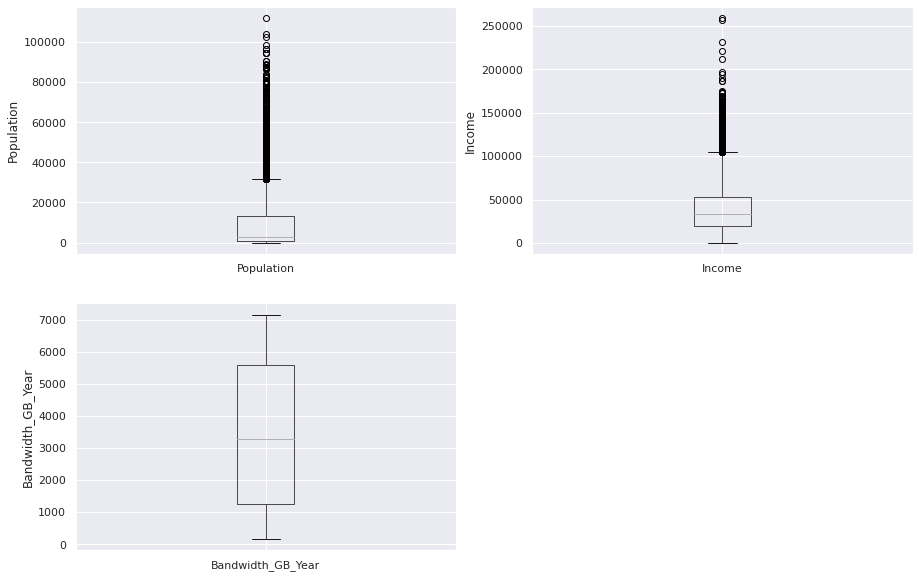

In [11]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Population')
fig.set_title('')
fig.set_ylabel('Population')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Income')
fig.set_title('')
fig.set_ylabel('Income')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Bandwidth_GB_Year')
fig.set_title('')
fig.set_ylabel('Bandwidth_GB_Year')

Text(0, 0.5, 'Churn')

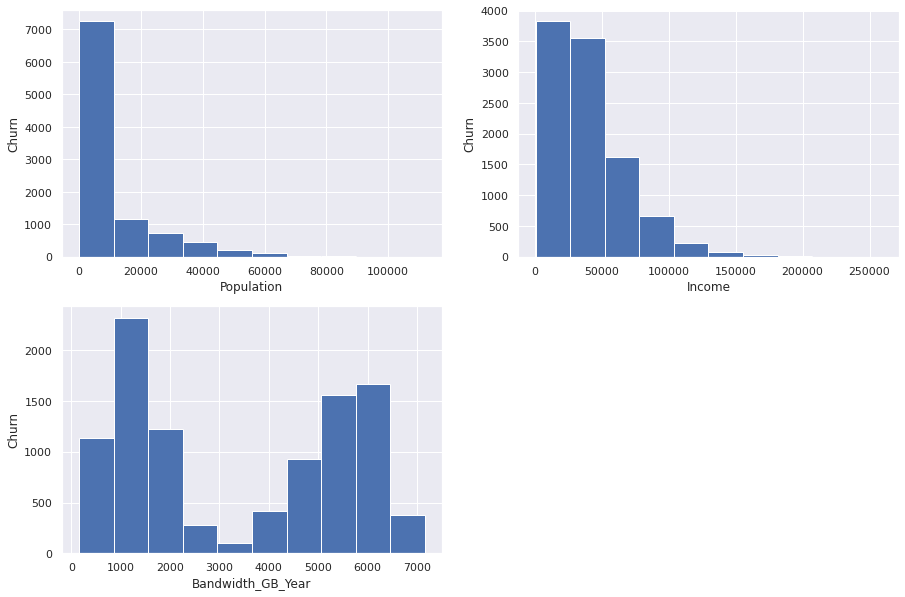

In [12]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 3)
fig = df.Bandwidth_GB_Year.hist(bins=10)
fig.set_xlabel('Bandwidth_GB_Year')
fig.set_ylabel('Churn')

In [13]:
# find outliers for Population

IQR = df.Population.quantile(0.75) - df.Population.quantile(0.25)
lower = df.Population.quantile(0.25) - (IQR * 3)
upper = df.Population.quantile(0.75) + (IQR * 3)
print('Population outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Population outliers are values < -36552.0 or > 50458.0


In [14]:
# find outliers for Income

IQR = df.Income.quantile(0.75) - df.Income.quantile(0.25)
lower = df.Income.quantile(0.25) - (IQR * 3)
upper = df.Income.quantile(0.75) + (IQR * 3)
print('Income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Income outliers are values < -82839.64 or > 155310.5275


In [15]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [df]:
    df3['Population'] = max_value(df3, 'Population', 50458.0)
    df3['Income'] = max_value(df3, 'Income', 155310.5275)

In [16]:
print(df.Population.max(), df.Income.max())

50458.0 155310.5275


Text(0, 0.5, 'Churn')

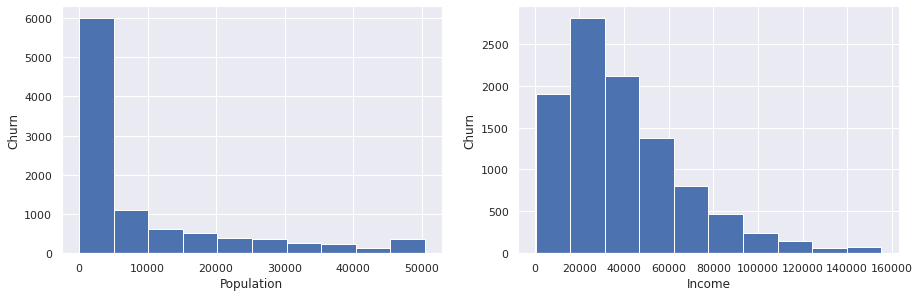

In [17]:
# plot histogram to check distribution of removed outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')

In [18]:
# Desired data set
df.to_csv('K-means_cluster_churn.csv', index=False)

## PCA

### D1.

In [19]:
scaler = StandardScaler()
df_std = df

le = preprocessing.LabelEncoder()

# transforming categorical datatypes into numerical types
for feature in categorical:
    df_std[feature] = le.fit_transform(df_std[feature])

df_std = scaler.fit_transform(df_std)
    
df_std  

array([[-0.71437651, -0.97233791,  0.72092524, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 0.07827537, -0.50659192, -1.25995716, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-0.43282059,  0.89064606, -0.14873045, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.68635038, -0.50659192, -0.24535886, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 1.99204833, -0.50659192, -0.6801867 , ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 0.21414114, -0.50659192, -1.21164295, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [20]:
pca = PCA()
pca.fit(df_std)

PCA()

In [21]:
pca.explained_variance_ratio_

array([0.15518765, 0.10510396, 0.08613855, 0.05570153, 0.05423195,
       0.05359141, 0.05293564, 0.05260435, 0.05216304, 0.0515712 ,
       0.05073044, 0.05054881, 0.040971  , 0.03632769, 0.03116657,
       0.0283023 , 0.02535444, 0.01708214, 0.00028733])

### D2.

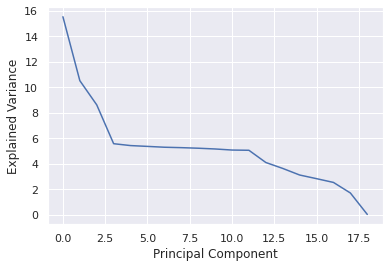

In [22]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [23]:
components = [i * 100 for i in list(pca.explained_variance_ratio_)]

### D3.

### All components explained variance

In [24]:
for n, i in enumerate(components):
    print('Principal Component ', n + 1, ' explained variance: ', i)

Principal Component  1  explained variance:  15.518764870671351
Principal Component  2  explained variance:  10.510395567744322
Principal Component  3  explained variance:  8.613855398280586
Principal Component  4  explained variance:  5.570153075667193
Principal Component  5  explained variance:  5.423194565342972
Principal Component  6  explained variance:  5.359140936947409
Principal Component  7  explained variance:  5.293564166322155
Principal Component  8  explained variance:  5.260434519888916
Principal Component  9  explained variance:  5.216304460061086
Principal Component  10  explained variance:  5.157119807534598
Principal Component  11  explained variance:  5.073043930753796
Principal Component  12  explained variance:  5.0548813472639775
Principal Component  13  explained variance:  4.097099685084196
Principal Component  14  explained variance:  3.632768745593125
Principal Component  15  explained variance:  3.1166565807373225
Principal Component  16  explained variance: 

### Principal components explained variance

In [25]:
principal_components = []
for n, i in enumerate(components):
    if n == 3:
        break
    principal_components.append(i)
    print('Principal Component ', n + 1, ' explained variance: ', i)

Principal Component  1  explained variance:  15.518764870671351
Principal Component  2  explained variance:  10.510395567744322
Principal Component  3  explained variance:  8.613855398280586


### D4.

In [26]:
print('Total variance from principal components: ', sum(principal_components))

Total variance from principal components:  34.64301583669626


### D5. Summary

After performing data analysis, we found that there are 3 principal component consisting of roughly 37% of the explained variance. We could use this method to reduce the model significantly to help save computation power and demystify the importance of the features that matter to the customer. Also after reviewing the visual aid, it appears as if components 4 - 11 have hardly any influence on the data at all.